In [1]:
# Installer DeepFace et les bibliothèques nécessaires
!pip install deepface opencv-python numpy matplotlib pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=744fe1eb46d76616d962e8e24ac258b49cafbc6fa732411c04323ecd6daf5601
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
# 📦 Imports de base
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


25-06-03 15:27:58 - Directory /root/.deepface has been created
25-06-03 15:27:58 - Directory /root/.deepface/weights has been created


In [4]:
# 🔧 Fonctions utilitaires pour ArcFace et affichage

def compare_faces_arcface(path_img1, path_img2):
    """
    Compare deux visages avec DeepFace + ArcFace.
    Renvoie le dictionnaire produit par DeepFace.verify().
    """
    result = DeepFace.verify(
        img1_path = path_img1,
        img2_path = path_img2,
        model_name='ArcFace'
    )
    return result

def display_two_images(path_img1, path_img2, title1="Image 1", title2="Image 2"):
    """
    Affiche côte à côte deux images : path_img1 et path_img2.
    """
    img1 = Image.open(path_img1)
    img2 = Image.open(path_img2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title(title1)
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title(title2)
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [5]:
# 📁 Création des dossiers "data/ids" et "data/selfies"
os.makedirs("data/ids", exist_ok=True)
os.makedirs("data/selfies", exist_ok=True)

print("✓ Dossiers créés :")
print("- data/ids")
print("- data/selfies")


✓ Dossiers créés :
- data/ids
- data/selfies


In [6]:
# 🔄 Exemple de déplacement des fichiers téléversés vers les bons dossiers
# Remplacez "user1_id.png" et "user1_selfie.png" par vos noms de fichiers exacts

# Si vous avez téléversé directement dans la racine de Colab :
!mv user1_id.png data/ids/
!mv user1_selfie.png data/selfies/

# Affiche la liste des fichiers pour vérifier
print("Contenu de data/ids :", os.listdir("data/ids"))
print("Contenu de data/selfies :", os.listdir("data/selfies"))


Contenu de data/ids : ['user1_id.png']
Contenu de data/selfies : ['user1_selfie.png']


✓ Les deux fichiers existent.


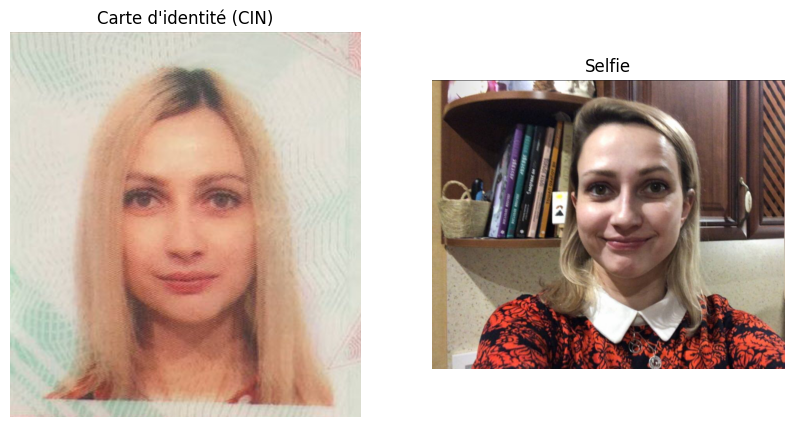

In [7]:
# 🚀 Chemins vers les images d'exemple (à adapter selon vos noms de fichiers)
id_path = "data/ids/user1_id.png"
selfie_path = "data/selfies/user1_selfie.png"

# Vérification manuelle que les fichiers existent
for p in [id_path, selfie_path]:
    if not os.path.isfile(p):
        raise FileNotFoundError(f"Le fichier n'existe pas : {p}")
print("✓ Les deux fichiers existent.")

# Chargement via OpenCV (BGR → RGB)
img_id = cv2.cvtColor(cv2.imread(id_path), cv2.COLOR_BGR2RGB)
img_selfie = cv2.cvtColor(cv2.imread(selfie_path), cv2.COLOR_BGR2RGB)

# Affichage côte à côte pour s'assurer que tout est bien chargé
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_id)
axes[0].set_title("Carte d'identité (CIN)")
axes[0].axis("off")
axes[1].imshow(img_selfie)
axes[1].set_title("Selfie")
axes[1].axis("off")
plt.show()


25-06-03 15:39:33 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:00<00:00, 225MB/s]


Résultat DeepFace.verify() :
{'verified': True, 'distance': 0.34712455930835473, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 90, 'y': 113, 'w': 286, 'h': 286, 'left_eye': (278, 225), 'right_eye': (174, 223)}, 'img2': {'x': 254, 'y': 108, 'w': 315, 'h': 315, 'left_eye': (469, 227), 'right_eye': (357, 229)}}, 'time': 6.44}

✔ Vérifié ?  : True
📏 Distance : 0.3471
🧠 Modèle   : ArcFace


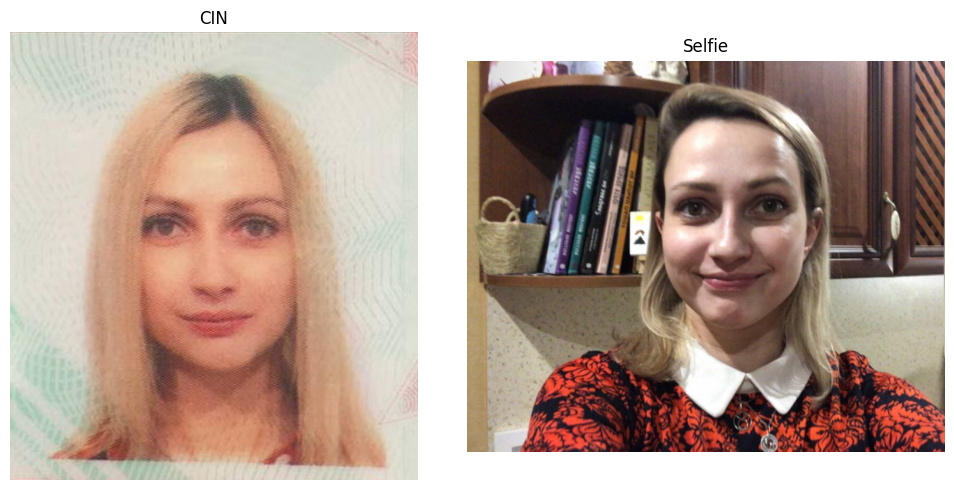

In [8]:
#  Exécution de la comparaison DeepFace (modèle ArcFace)
result = compare_faces_arcface(id_path, selfie_path)

# Affiche le résultat brut
print("Résultat DeepFace.verify() :")
print(result)

# Extrait des informations clés
status = result.get("verified", None)
distance = result.get("distance", None)
model_used = result.get("model", None)

print(f"\n✔ Vérifié ?  : {status}")
print(f" Distance : {distance:.4f}")
print(f" Modèle   : {model_used}")

# Réaffiche les deux images pour confort visuel
display_two_images(id_path, selfie_path, title1="CIN", title2="Selfie")


In [16]:
# 🔄 Exemple de déplacement des fichiers téléversés vers les bons dossiers
# Remplacez "user2_id.png" et "user2_selfie.png" par vos noms de fichiers exacts

# Si vous avez téléversé directement dans la racine de Colab :
!mv user2_id.png data/ids/
!mv user2_selfie.png data/selfies/

# Affiche la liste des fichiers pour vérifier
print("Contenu de data/ids :", os.listdir("data/ids"))
print("Contenu de data/selfies :", os.listdir("data/selfies"))

mv: cannot stat 'user2_id.png': No such file or directory
mv: cannot stat 'user2_selfie.png': No such file or directory
Contenu de data/ids : ['.ipynb_checkpoints', 'user2_id.png', 'user1_id.png']
Contenu de data/selfies : ['.ipynb_checkpoints', 'user2_selfie.png', 'user1_selfie.png']


✓ Les deux fichiers existent.


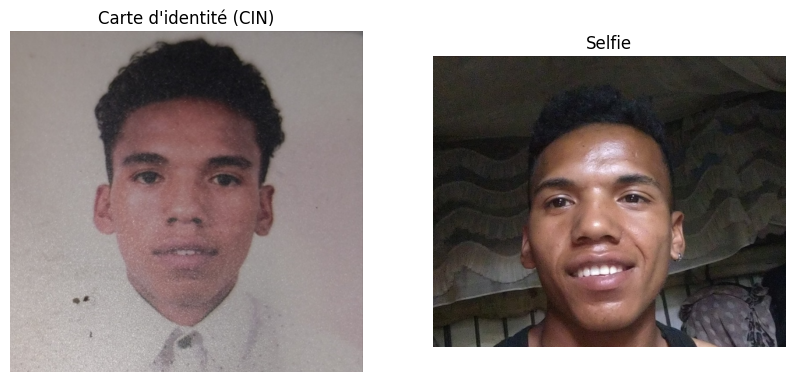

In [17]:
#  Chemins vers les images d'exemple (à adapter selon vos noms de fichiers)
id_path = "data/ids/user2_id.png"
selfie_path = "data/selfies/user2_selfie.png"

# Vérification manuelle que les fichiers existent
for p in [id_path, selfie_path]:
    if not os.path.isfile(p):
        raise FileNotFoundError(f"Le fichier n'existe pas : {p}")
print("✓ Les deux fichiers existent.")

# Chargement via OpenCV (BGR → RGB)
img_id = cv2.cvtColor(cv2.imread(id_path), cv2.COLOR_BGR2RGB)
img_selfie = cv2.cvtColor(cv2.imread(selfie_path), cv2.COLOR_BGR2RGB)

# Affichage côte à côte pour s'assurer que tout est bien chargé
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_id)
axes[0].set_title("Carte d'identité (CIN)")
axes[0].axis("off")
axes[1].imshow(img_selfie)
axes[1].set_title("Selfie")
axes[1].axis("off")
plt.show()

Résultat DeepFace.verify() :
{'verified': True, 'distance': 0.4486590078231355, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 101, 'y': 86, 'w': 252, 'h': 252, 'left_eye': (270, 190), 'right_eye': (174, 187)}, 'img2': {'x': 171, 'y': 159, 'w': 359, 'h': 359, 'left_eye': (419, 301), 'right_eye': (265, 311)}}, 'time': 2.02}

✔ Vérifié ?  : True
 Distance : 0.4487
 Modèle   : ArcFace


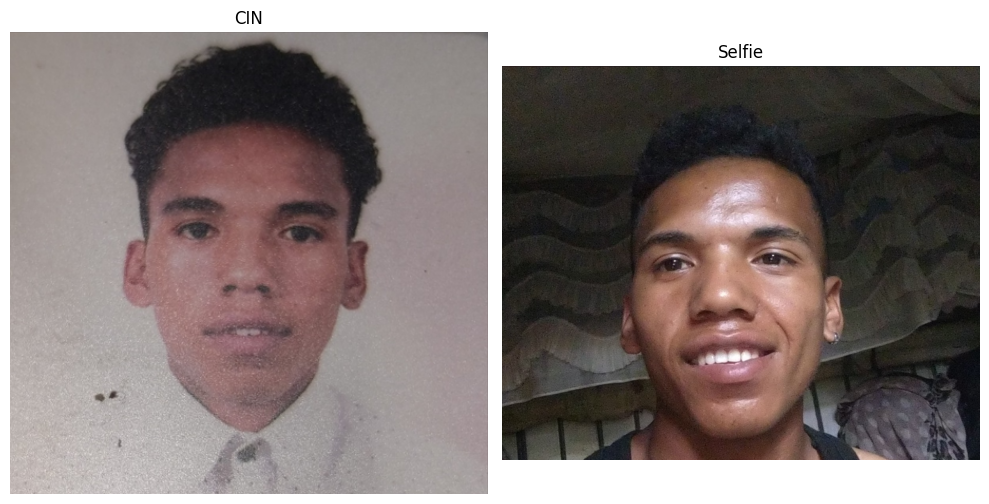

In [18]:
#  Exécution de la comparaison DeepFace (modèle ArcFace)
result = compare_faces_arcface(id_path, selfie_path)

# Affiche le résultat brut
print("Résultat DeepFace.verify() :")
print(result)

# Extrait des informations clés
status = result.get("verified", None)
distance = result.get("distance", None)
model_used = result.get("model", None)

print(f"\n✔ Vérifié ?  : {status}")
print(f" Distance : {distance:.4f}")
print(f" Modèle   : {model_used}")

# Réaffiche les deux images pour confort visuel
display_two_images(id_path, selfie_path, title1="CIN", title2="Selfie")